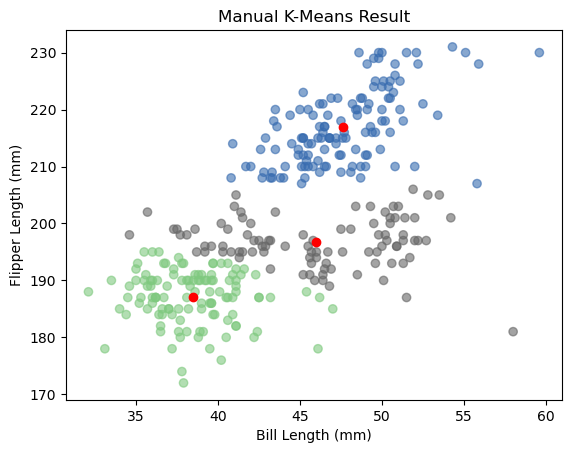

In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


def manual_kmeans(arr, k=3, iter=5, rand_seed=42):

    np.random.seed(rand_seed)
    centroids = arr[np.random.choice(arr.shape[0], k, replace=False)]

    for n in range(iter): 
        distances = cdist(arr, centroids)
        labels = np.argmin(distances, axis=1)
        
        for i in range(k):
            centroids[i] = arr[labels == i].mean(axis=0)

    plt.scatter(
        arr[:, 0], arr[:, 1], 
            c=labels, cmap='Accent', alpha=0.6)
    plt.scatter(
        centroids[:, 0], centroids[:, 1], 
            color='red', marker='o')

    plt.xlabel("Bill Length (mm)")
    plt.ylabel("Flipper Length (mm)")
    plt.title("Manual K-Means Result")
    plt.show()

penguins = pd.read_csv('data/palmer_penguins.csv')
quack = penguins.loc[:,['bill_length_mm', 'flipper_length_mm']].dropna().values
manual_kmeans(quack, k=3, iter=10)

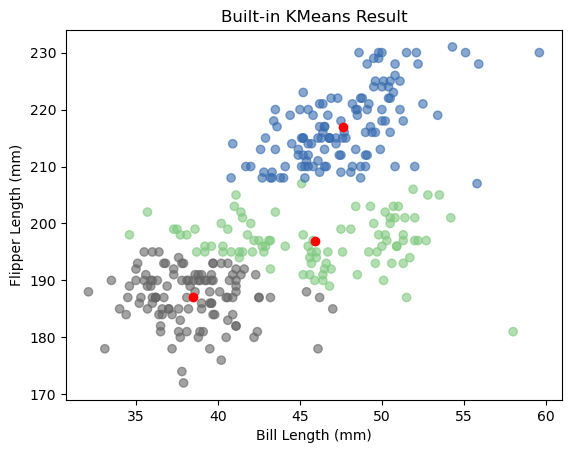

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=15, random_state=42)

kmeans.fit(quack)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(
        quack[:, 0], quack[:, 1], 
            c=labels, cmap='Accent', alpha=0.6)
plt.scatter(
        centroids[:, 0], centroids[:, 1], 
            color='red', marker='o')


plt.xlabel("Bill Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.title("Built-in KMeans Result")
plt.show()

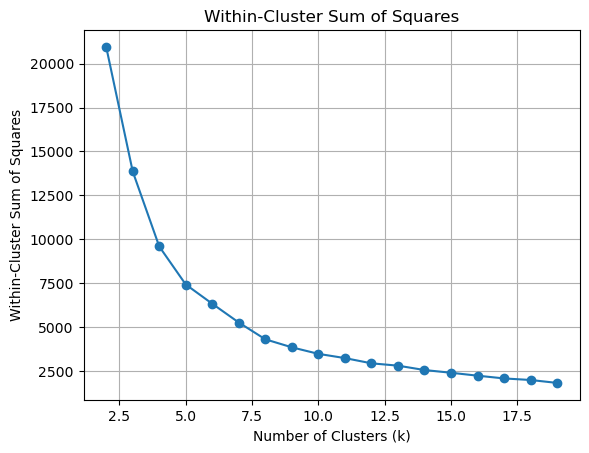

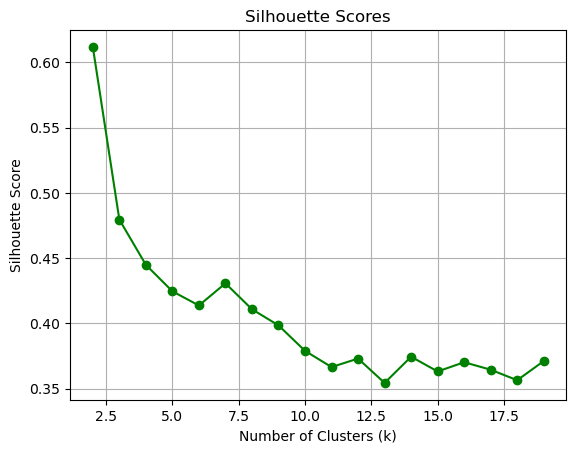

In [20]:

from sklearn.metrics import silhouette_score
wcss = []
silhouette = []
K_range = range(2, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(quack)
    wcss.append(kmeans.inertia_)
    silhouette.append(silhouette_score(quack, labels))

plt.plot(K_range, wcss, marker='o')
plt.title("Within-Cluster Sum of Squares")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares")
plt.grid(True)
plt.show()

plt.plot(K_range, silhouette, marker='o', color='green')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

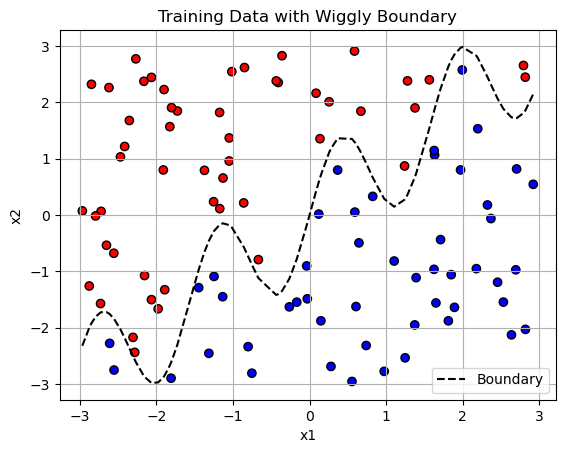

In [22]:
np.random.seed(42)
n = 100
x1 = np.random.uniform(-3, 3, n)
x2 = np.random.uniform(-3, 3, n)
boundary = np.sin(4 * x1) + x1
y = (x2 > boundary).astype(int)

train = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

plt.scatter(train['x1'], train['x2'], c=train['y'], cmap='bwr', edgecolor='k')
plt.plot(np.sort(x1), np.sin(4 * np.sort(x1)) + np.sort(x1), color='black', linestyle='--', label='Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training Data with Wiggly Boundary')
plt.legend()
plt.grid(True)
plt.show()

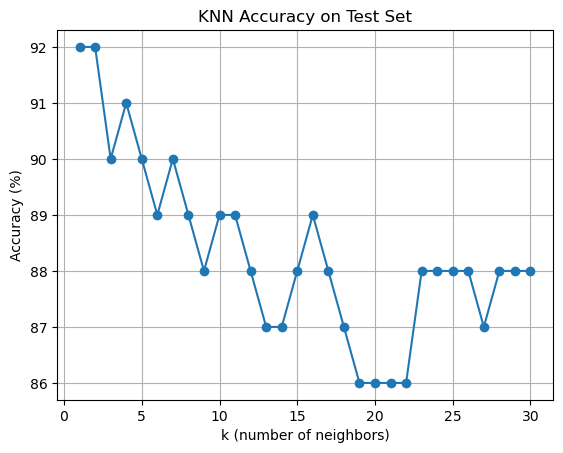

In [24]:
np.random.seed(99)
x1_test = np.random.uniform(-3, 3, n)
x2_test = np.random.uniform(-3, 3, n)
boundary_test = np.sin(4 * x1_test) + x1_test
y_test = (x2_test > boundary_test).astype(int)

test = pd.DataFrame({'x1': x1_test, 'x2': x2_test, 'y': y_test})

def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

def knn_predict(X_train, y_train, X_test, k):
    preds = []
    for point in X_test:
        dists = euclidean(X_train, point)
        nearest = y_train[np.argsort(dists)[:k]]
        pred = np.round(np.mean(nearest)).astype(int)  # majority vote
        preds.append(pred)
    return np.array(preds)

X_train = train[['x1', 'x2']].to_numpy()
y_train = train['y'].to_numpy()
X_test = test[['x1', 'x2']].to_numpy()
y_true = test['y'].to_numpy()

accuracies = []

for k in range(1, 31):
    y_pred = knn_predict(X_train, y_train, X_test, k)
    acc = np.mean(y_pred == y_true)
    accuracies.append(acc)

plt.plot(range(1, 31), [a * 100 for a in accuracies], marker='o')
plt.title("KNN Accuracy on Test Set")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()